## Feature Engineering

In [308]:
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

import xgboost as xgb

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
# ROUTES

RUTA_PARA_ENTRENAR = './../datasets/train_values.csv'
RUTA_PARA_ACTUALIZAR_DS_DE_TRAINING = './../datasets/train_values_FE.csv'

RUTA_PARA_TESTEAR = './../x/test_values.csv'
RUTA_PARA_ACTUALIZAR_DS_DE_TEST = './../x/test_values_FE.csv'

ORIGEN = RUTA_PARA_ENTRENAR
ORIGEN_LABEL = './../datasets/train_labels.csv'
DESTINO = RUTA_PARA_ACTUALIZAR_DS_DE_TRAINING

### Importamos las features originales

In [310]:
df_train_values = pd.read_csv(ORIGEN)
df_train_labels = pd.read_csv(ORIGEN_LABEL)

In [311]:
df_a_filtrar = df_train_values

In [312]:
df_a_filtrar.head(1)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0


### Building_id

In [313]:
#df_a_filtrar = df_a_filtrar.drop(['building_id'], axis=1)

## Encoding

In [314]:
encoder = OneHotEncoder()

### Geo Level 1 id 

Como geolevel no tiene una relación de orden entre cada uno de sus elementos, debemos hacer un encoding para poder predecir.geo_level_1_idgeo_level_1_id

In [315]:
df_a_filtrar['geo_level_1_id'] = pd.Categorical(df_a_filtrar['geo_level_1_id'])
df_a_filtrar[['gl0', 'gl1', 'gl2', 'gl3', 'gl4', 'gl5', 'gl6', 'gl7', 'gl8', 'gl9', 'gl10', 'gl11', 'gl12', 'gl13', 'gl14', 'gl15', 'gl16', 'gl17', 'gl18', 'gl19', 'gl20', 'gl21', 'gl22', 'gl23', 'gl24', 'gl25', 'gl26', 'gl27', 'gl28', 'gl29', 'gl30']] = pd.get_dummies(df_a_filtrar['geo_level_1_id'])

In [316]:
df_a_filtrar = df_a_filtrar.drop(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'], axis=1)

## count_floors_pre_eq

Al tener una relación de orden, no es necesario hacer un encoding de los datos.

### corregir si es necesario, sacando los datos que tienen pocas muestras.

In [317]:
df_a_filtrar['count_floors_pre_eq'].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
8         1
9         1
Name: count_floors_pre_eq, dtype: int64

## Age

In [318]:
df_a_filtrar['age'].value_counts().head(10)

10    38896
15    36010
5     33697
20    32182
0     26041
25    24366
30    18028
35    10710
40    10559
50     7257
Name: age, dtype: int64

## area_percentage

In [319]:
df_a_filtrar['area_percentage'].value_counts()

6      42013
7      36752
5      32724
8      28445
9      22199
       ...  
82         1
80         1
78         1
75         1
100        1
Name: area_percentage, Length: 84, dtype: int64

## Categóricos 

### land_surface_condition

In [320]:
df_a_filtrar['land_surface_condition'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

In [321]:
df_a_filtrar[['lsc_t', 'lsc_n', 'lsc_o']] = pd.get_dummies(df_a_filtrar['land_surface_condition'])

In [322]:
df_a_filtrar = df_a_filtrar.drop(['land_surface_condition'], axis=1)

### foundation_type

In [323]:
df_a_filtrar['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

In [324]:
df_a_filtrar[['ft_r', 'ft_w', 'ft_u', 'ft_i', 'ft_h']] = pd.get_dummies(df_a_filtrar['foundation_type'])

In [325]:
df_a_filtrar = df_a_filtrar.drop(['foundation_type'], axis=1)

### roof_type

In [326]:
df_a_filtrar['roof_type'].value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

In [327]:
df_a_filtrar[['rt_n', 'rt_q', 'rt_x']] = pd.get_dummies(df_a_filtrar['roof_type'])

In [328]:
df_a_filtrar = df_a_filtrar.drop(['roof_type'], axis=1)

### ground_floor_type

In [329]:
df_a_filtrar['ground_floor_type'].value_counts()

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

In [330]:
df_a_filtrar[['gft_f', 'gft_x', 'gft_v', 'gft_z', 'gft_m']] = pd.get_dummies(df_a_filtrar['ground_floor_type'])

In [331]:
df_a_filtrar = df_a_filtrar.drop(['ground_floor_type'], axis=1)

### other_floor_type

Quiza conviene combinarlo con floor type

In [332]:
df_a_filtrar['other_floor_type'].value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

In [333]:
df_a_filtrar[['oft_q', 'oft_x', 'oft_j', 'oft_s']] = pd.get_dummies(df_a_filtrar['other_floor_type'])

In [334]:
df_a_filtrar = df_a_filtrar.drop(['other_floor_type'], axis=1)

### position

In [335]:
df_a_filtrar['position'].value_counts()

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

In [336]:
df_a_filtrar[['p_s', 'p_t', 'p_j', 'p_o']] = pd.get_dummies(df_a_filtrar['position'])

In [337]:
df_a_filtrar = df_a_filtrar.drop(['position'], axis=1)

### plan_configuration

In [338]:
df_a_filtrar['plan_configuration'].value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

In [339]:
df_a_filtrar[['pc_d', 'pc_q', 'pq_u', 'pc_s', 'pc_c', 'pc_a', 'pc_o', 'pc_m', 'pc_n', 'pc_f']] = pd.get_dummies(df_a_filtrar['plan_configuration'])

In [340]:
df_a_filtrar = df_a_filtrar.drop(['plan_configuration'], axis=1)

## legal_ownership_status

In [341]:
df_a_filtrar['legal_ownership_status'].value_counts()

v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64

In [342]:
df_a_filtrar[['los_v', 'los_a', 'los_w', 'los_r']] = pd.get_dummies(df_a_filtrar['legal_ownership_status'])

In [343]:
df_a_filtrar = df_a_filtrar.drop(['legal_ownership_status'], axis=1)

## Análisis de importancia

#### Se analiza la importancia de las features encodeadas

In [259]:
df_train_values_sin_building_id = df_a_filtrar
df_train_values_sin_building_id = df_train_values_sin_building_id.drop(['building_id'], axis=1)

In [260]:
# Calculate the actual features.
params = {
    'subsample': 0.8,
    'num_parallel_tree': 2,
    'n_estimators': 500, 
    'max_depth': 12,
    'learning_rate': 0.1,
    'colsample_bytree': 0.5
}
num_features = 20
best_features = SelectKBest(score_func=chi2, k=num_features)
best_features.fit(df_train_values_sin_building_id, df_train_labels.damage_grade)

# Filter out the train and test set.
best_indices = best_features.get_support(indices=True)
k_features_mas_imporantes = df_train_values_sin_building_id[df_train_values_sin_building_id.columns[best_indices]]

pd.DataFrame(zip(k_features_mas_imporantes.columns, best_features.scores_), columns=['Feature', 'Score']).sort_values('Score', ascending=False).head(num_features)

,Feature,Score
1,area_percentage,89437.601578
9,gl26,18949.414382
13,ft_h,14411.297027
2,has_superstructure_mud_mortar_stone,11938.314627
12,ft_i,8725.518483
5,has_superstructure_rc_engineered,6969.601844
18,oft_x,2937.304376
19,oft_j,2635.341540
16,gft_v,1485.663306
4,has_superstructure_rc_non_engineered,1340.145544


## Análisis de la correlación

#### Se analiza la correlación de las k-features mas importantes

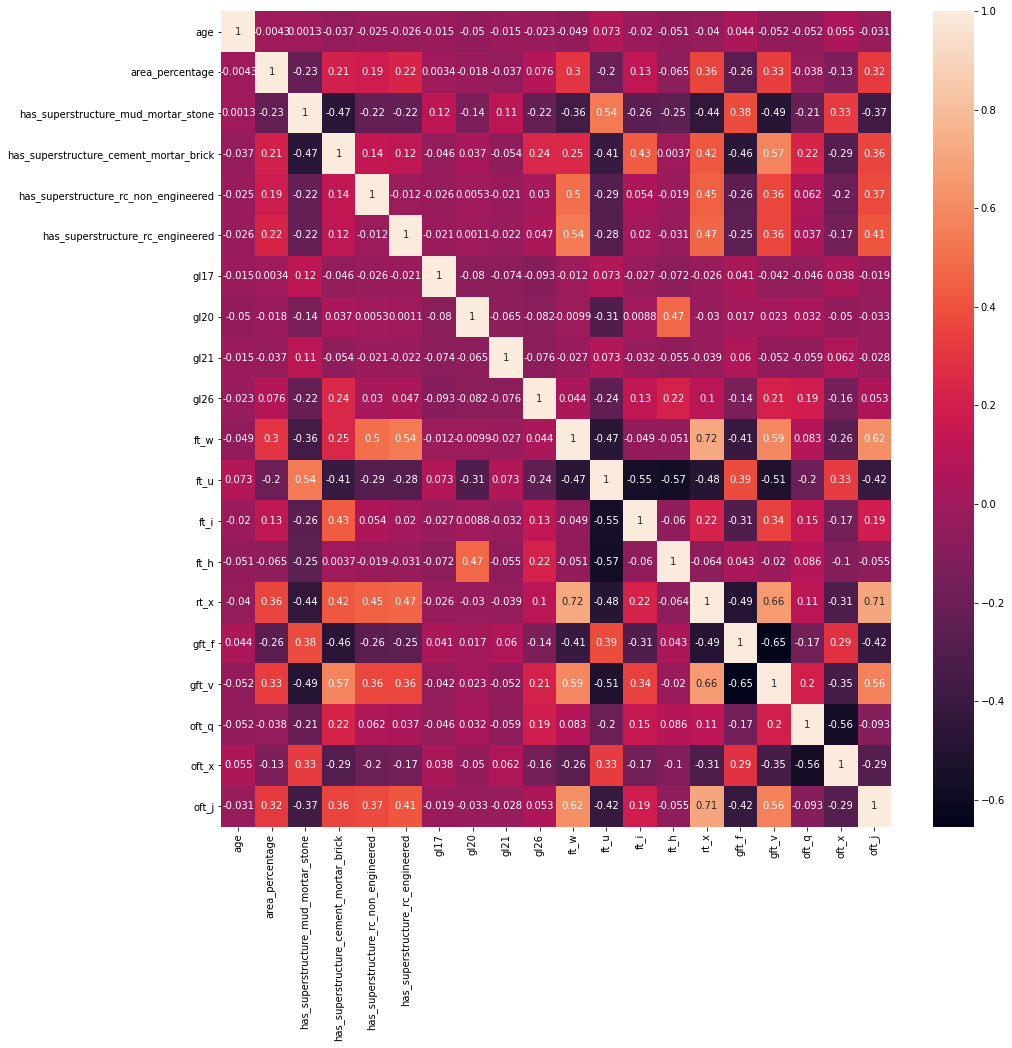

,age,area_percentage,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,gl17,gl20,gl21,gl26,ft_w,ft_u,ft_i,ft_h,rt_x,gft_f,gft_v,oft_q,oft_x,oft_j
age,1.000000,-0.004323,0.001321,-0.036992,-0.025431,-0.025552,-0.015051,-0.049672,-0.015100,-0.023106,-0.048860,0.072640,-0.020131,-0.051184,-0.040087,0.043668,-0.052342,-0.051634,0.054615,-0.031045
area_percentage,-0.004323,1.000000,-0.225541,0.210800,0.185047,0.224647,0.003367,-0.018352,-0.036685,0.076300,0.301688,-0.198506,0.126860,-0.064849,0.357777,-0.258259,0.328150,-0.037512,-0.129557,0.317857
has_superstructure_mud_mortar_stone,0.001321,-0.225541,1.000000,-0.470715,-0.222366,-0.224509,0.118321,-0.135822,0.114771,-0.218504,-0.359323,0.538937,-0.260836,-0.251562,-0.437898,0.382414,-0.487756,-0.206889,0.325957,-0.366995
has_superstructure_cement_mortar_brick,-0.036992,0.210800,-0.470715,1.000000,0.138915,0.121070,-0.046471,0.036608,-0.054437,0.237399,0.246290,-0.405372,0.432362,0.003677,0.419886,-0.463885,0.573645,0.224796,-0.290010,0.356077
has_superstructure_rc_non_engineered,-0.025431,0.185047,-0.222366,0.138915,1.000000,-0.012324,-0.025664,0.005338,-0.021134,0.030365,0.499215,-0.289362,0.054450,-0.019256,0.445971,-0.258811,0.362685,0.062207,-0.197049,0.373658
has_superstructure_rc_engineered,-0.025552,0.224647,-0.224509,0.121070,-0.012324,1.000000,-0.020955,0.001108,-0.021853,0.047171,0.540876,-0.283009,0.019696,-0.030715,0.466875,-0.251369,0.362155,0.037306,-0.165441,0.412847
gl17,-0.015051,0.003367,0.118321,-0.046471,-0.025664,-0.020955,1.000000,-0.080384,-0.074400,-0.093170,-0.011900,0.072686,-0.027452,-0.071626,-0.025696,0.040564,-0.042254,-0.045777,0.038188,-0.019334
gl20,-0.049672,-0.018352,-0.135822,0.036608,0.005338,0.001108,-0.080384,1.000000,-0.065469,-0.081986,-0.009932,-0.307759,0.008759,0.471140,-0.030156,0.016512,0.023427,0.032447,-0.049683,-0.032514
gl21,-0.015100,-0.036685,0.114771,-0.054437,-0.021134,-0.021853,-0.074400,-0.065469,1.000000,-0.075883,-0.027178,0.073022,-0.032038,-0.055289,-0.039226,0.059548,-0.051695,-0.059050,0.062367,-0.028382
gl26,-0.023106,0.076300,-0.218504,0.237399,0.030365,0.047171,-0.093170,-0.081986,-0.075883,1.000000,0.043718,-0.243107,0.132126,0.215110,0.103397,-0.136925,0.213214,0.189322,-0.162198,0.052505


In [182]:
train_corr = k_features_mas_imporantes.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(train_corr, xticklabels=train_corr.columns, yticklabels=train_corr.columns, annot=True)
plt.show()

train_corr.style.background_gradient(sns.diverging_palette(220, 10, as_cmap=True), axis=1)

In [195]:
building_id = df_a_filtrar['building_id']
prueba = df_a_filtrar[df_train_values_sin_building_id.columns[best_indices]]
prueba['building_id'] = building_id
prueba

<ipython-input-195-e74cd889f215>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['building_id'] = building_id


,age,area_percentage,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,gl17,gl20,gl21,gl26,...,ft_u,ft_i,ft_h,rt_x,gft_f,gft_v,oft_q,oft_x,oft_j,building_id
0,30,6,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,802906
1,10,8,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,28830
2,10,5,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,94947
3,10,6,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,590882
4,30,8,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,201944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,55,6,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,688636
260597,0,6,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,669485
260598,55,6,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,602512
260599,10,14,0,1,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,151409


## DataFrame con primer encoding

Usando One-hot Encoder

In [345]:
df_a_filtrar = df_a_filtrar.set_index(['building_id'])
df_a_filtrar.to_csv(DESTINO)

In [346]:
df_a_filtrar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 96 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   count_floors_pre_eq                     260601 non-null  int64
 1   age                                     260601 non-null  int64
 2   area_percentage                         260601 non-null  int64
 3   height_percentage                       260601 non-null  int64
 4   has_superstructure_adobe_mud            260601 non-null  int64
 5   has_superstructure_mud_mortar_stone     260601 non-null  int64
 6   has_superstructure_stone_flag           260601 non-null  int64
 7   has_superstructure_cement_mortar_stone  260601 non-null  int64
 8   has_superstructure_mud_mortar_brick     260601 non-null  int64
 9   has_superstructure_cement_mortar_brick  260601 non-null  int64
 10  has_superstructure_timber               260601 non-null  int64


In [219]:
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [367]:
xgb_cl = xgb.XGBClassifier(
    objective="multi:softprob",
    seed=42,
    nthread=3,
    subsample=0.8,
    num_parallel_tree=2,
    n_estimators=500,
    max_depth=14,
    learning_rate=0.1,
    min_child_weight=30
)

df_train_labels_filtrados = df_train_labels.drop(['building_id'], axis=1)
df_train_values_filtrados = df_a_filtrar.reset_index().drop(['building_id'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    df_train_values_filtrados,
    df_train_labels_filtrados,
    test_size=0.3,
    random_state=123
)

eval_set = [(X_test, y_test)]
training = xgb_cl.fit(X_train, y_train, early_stopping_rounds=10, verbose=True, eval_set=eval_set)

/home/nahuel/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nahuel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[16:26:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.03109
[1]	validation_0-mlogloss:0.97975
[2]	validation_0-mlogloss:0.93695
[3]	validation_0-mlogloss:0.89957
[4]	validation_0-mlogloss:0.86852
[5]	validation_0-mlogloss:0.84628
[6]	validation_0-mlogloss:0.82117
[7]	validation_0-mlogloss:0.80590
[8]	validation_0-mlogloss:0.79109
[9]	validation_0-mlogloss:0.77974
[10]	validation_0-mlogloss:0.76967
[11]	validation_0-mlogloss:0.76118
[12]	validation_0-mlogloss:0.75281
[13]	validation_0-mlogloss:0.74600
[14]	validation_0-mlogloss:0.73979
[15]	validation_0-mlogloss:0.73358
[16]	validation_0-mlogloss:0.72831
[17]	validation_0-mlogloss:0.72355
[18]	validation_0-mlogloss:0.71927
[19]	validation_0-mlogloss:0.71473
[20]	validation_0-mlogloss:0.71198
[21]	validation_0-mlog

### Se hace la predicción

In [368]:
preds = training.predict(X_test)

### Error de entrenamiento

In [369]:
xgb_cl.score(X_train, y_train)

0.7286810656726236

### Error de generalización o testing

In [370]:
xgb_cl.score(X_test, y_test)

0.7001189547332473

### Se calcula el error

In [357]:
score = f1_score(y_test, preds, average='micro')

In [358]:
print("El score es: " + str(score))

El score es: 0.7026771210396388
